<a href="https://colab.research.google.com/github/svanhemert00/lmu-isba-4790/blob/main/Mini_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Assignment 7. Data Aggregartion & Visualization
Please add one code cell after each question and create a program to answer the question. Make sure your code runs without error. After you are finished, click on File -> Print -> Save as PDF to create a PDF output and upload it on Brightspace.

NOTE: Make sure your PDF does not have your name or any identifying information in the name or content of the file. Anonymity is essential for the peer-review process.

## Data Aggregation: Black Friday
Here we have the dataset for Black Friday shoppers' purchase records acquired from Kaggle and available for [download here](https://drive.google.com/file/d/1IOvYog7JUWUAYzSRUTmJ20lDkUsVl6dX/view?usp=sharing). The dataset includes 12 columns and more than 500K rows. It contains the following variables:

* **User_ID**
* **Product_ID**
* **Gender**
* **Age**
* **Occupation**
* **City_Category**
* **Stay_In_Current_City_Years**
* **Marital_Status**
* **Product_Category_1**
* **Product_Category_2**
* **Product_Category_3**
* **Purchase**

1. Read the dataset into a dataframe, and check out the first few rows and column data types.

In [ ]:
import pandas as pd
df = pd.read_csv("BlackFriday(1).csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


2. Display the min, average, and max of Purchase. It should be calculated and displayed in the same command.

In [ ]:
df.agg({'Purchase': ['min',
                     'mean',
                     'max']})

,Purchase
min,185.000000
mean,9333.859853
max,23961.000000


3. Display the number of products sold in each 'Product_Category_1'. Next, display the number of **UNIQUE** products sold in each 'Product_Category_1'.

 **Hint:** for the second part of the question, you may use .nunique() to count the number of unique items in any group.

In [ ]:
df.agg({'Product_Category_1': ['count',
                               'nunique']})

4. Use groupby to display the average and standard deviation of the Purchase for each Gender and City_Category. Round the numbers to show only one decimal place.

In [ ]:
df.groupby(['Gender', 'City_Category']).agg({'Purchase': ['mean','std']})

Purchase             
                              mean          std
Gender City_Category                           
F      A               8630.771856  4642.544055
       B               8590.518480  4648.512616
       C               9264.964642  4854.373347
M      A               9061.717739  4931.360715
       B               9400.754481  4999.872424
       C              10033.197730  5175.889378

5. Display the top three most profitable customers (User_ID & total purchase should be displayed). 

 **Hint:** you should get the sum of Purchase for each customer and then use an aggregate function that displays the top largest customers in terms of their purchase. This should be all calculated and displayed in the same command.

In [ ]:
# func = lambda x: x.sort_values()
# df.groupby('User_ID')['Purchase'].agg('sum').head(3).apply(func)
df.groupby('User_ID')['Purchase'].agg('sum').head(3)

User_ID
1000001    333481
1000002    810353
1000003    341635
Name: Purchase, dtype: int64

6. Use pivot table to display the total Purchase for each Product_Category_1 (rows) and Gender (columns). Next, use the pivot table to create a line plot with two lines: one for male purchase across categor_1, and another for female purchase across category_1. Set proper line style, marker, color, legend, plot title, and axes labels. 

 Which category_1 values are more popular for each of the male and female customers?

In [ ]:
pivot = df.pivot_table(values= 'Purchase',
         index= 'Product_Category_1',
         columns= 'Gender',
         aggfunc= 'sum')
pivot.head()

Gender,F,M
Product_Category_1,,
1,331792660,1550873665
2,63581729,200915513
3,60278495,140133716
4,8774919,18163038
5,259800713,667116784


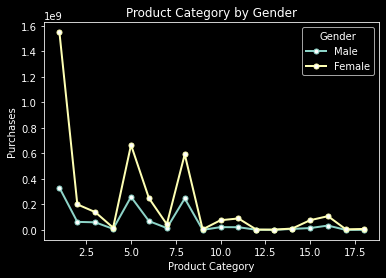

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(pivot, 
         linestyle='-',
         linewidth= 2,
         marker='.',
         markersize= 10,
         # label= 'M', -> here is where I'm stuck
         markerfacecolor= 'white')

gender = ['Male', 'Female']
plt.legend(gender, loc = 'upper right', title='Gender')
plt.title('Product Category by Gender')
plt.xlabel('Product Category')
plt.ylabel('Purchases')
plt.show()

##Data Visualization

7. Read the [population](https://datascience.quantecon.org/assets/data/wdi_population.csv) dataset and [financial](https://datascience.quantecon.org/assets/data/wdi_data.csv) dataset separately as dataframes. No need to change the index names.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pop = pd.read_csv('wdi_population.csv')
fin = pd.read_csv('wdi_data.csv')

8. Create a slice of financial dataset for 2017 data, and create another slice for 2000 data; store them in separate variables called fin2017 and fin2000.

 Use the above two variables to creae a line plot with two lines; one displays the GDP of the countries for 2017 and the other one displays the GDP of the countries for 2000. Make sure to:

*   set the x axis as country names and y axis as GDP
*   set proper linestyle and marker for each line
*   set proper color for line and markers
*   set proper legend for the plot with labels for each line
*   set proper plot title and axes labels


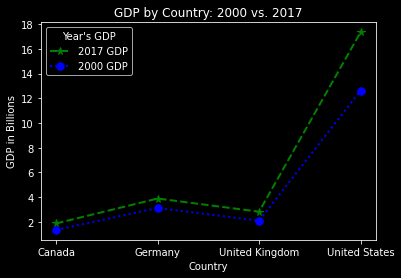

In [ ]:
fin2017 = fin.GDP[(fin.year == 2017)]
fin2000 = fin.GDP[(fin.year == 2000)]
country = fin.country[(fin.year == 2017)]

plt.plot(country,
         fin2017,
         linestyle='--',
         linewidth= 2,
         color= 'green',
         marker = '*',
         markersize= 7.5,
         label= '2017 GDP')
plt.plot(country,
         fin2000,
         linewidth= 2,
         color= 'blue',
         linestyle=':',
         marker= 'o',
         markersize= 7.5,
         label= '2000 GDP')
plt.legend(loc= 'upper left', title="Year's GDP")
plt.title('GDP by Country: 2000 vs. 2017')
plt.xlabel('Country')
plt.ylabel('GDP in Billions')
plt.show()

9. Slice the population dataset for the year 2017 records, and store the slice in 'pop2017' variable. Next, create a bar plot to compare the population of the countries in 2017. Make sure to set proper bar color, plot title, and axes labels.

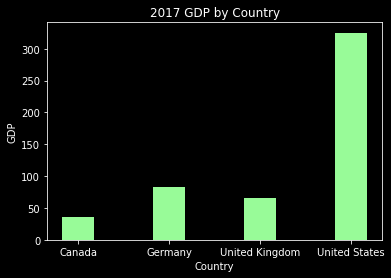

In [ ]:
pop2017 = pop.Population[(pop.year == 2017)]
pop_country = pop.country[(pop.year == 2017)]
width = 0.35
plt.bar(pop_country, pop2017, width, color='palegreen')
plt.title('2017 GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()

10. Slice the financial dataset for the rows for the United States. Then, use that to create a scatter plot to display the 'Exports' against the 'Imports' of the United States, and use the 'year' as color for the markers; it means the markers (data points) of later year will be shown with brighter colors on the scatterplot.

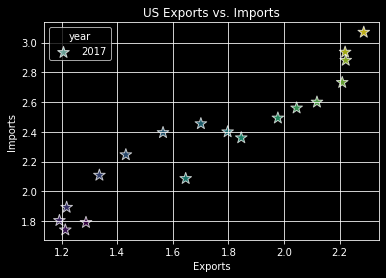

In [ ]:
us_exports = fin.Exports[(fin.country == 'United States')]
us_imports = fin.Imports[(fin.country == 'United States')]
color = fin.year[(fin.country == 'United States')]

plt.scatter(us_exports, 
            us_imports,
            s= 150,
            c= color,
            marker='*',
            edgecolor='white',
            linewidth=1,
            alpha=0.75)

plt.xlabel('Exports')
plt.ylabel('Imports')
plt.title('US Exports vs. Imports')
plt.grid(True)
plt.legend(fin.year[(fin.country == 'United States')], loc="best", title= 'year') # how do I put more years in the legend?
plt.show()

11. Use pop2017 dataframe to create a pie chart that displays the countries' population as a portion of the total population. Make sure to properly label the portions of the pie chart with country names, and the percentage of population they hold (the percentage should be flot with one decimal with a % sign). Explode the 'Canada' portion of the pie chart and properly title the plot.

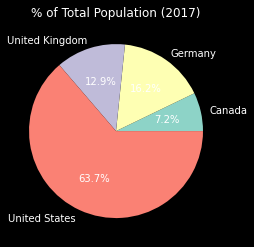

In [ ]:
totalpop2017 = pop.Population[(pop.year == 2017)].sum()
pop2017percent = pop2017 / totalpop2017 * 100

plt.pie(pop2017percent,
        labels= pop_country, # I am having trouble exploding Canada because of how I implemented the labels
        autopct='%1.1f%%')

plt.title('% of Total Population (2017)')
plt.show()